# Assignment 1 - Fundamentals of Quantum Computing 

In class you were introduced to the concept of quantum gates. We represent these gates as matrices, and the application of these gates to a quantum state - as multiplying that state by the gate matrix. In this assignment we are going to explore two gates: The Hadamard and the $R_y$ gate.

### Hadamard, or $H$ gate
$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

### $R_Y$ gate
$R_Y(\theta) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}$

> Applying these gates to a qubit state makes the state vector undergo a rotation in the two-dimensional Hilbert space, which describes our qubit. The Hadamard gate rotates the $|0\rangle$ state to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and the $|1\rangle$ state to $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle$. The $R_y$ gate rotates the qubit by an angle $\theta$ with eigenvectors the state $\frac{1}{\sqrt{2}}(|0\rangle \pm |1\rangle)$.


#### Run these cells before beginning to import necessary packages.
This cell may take a minute or more to complete. Importing qsharp triggers a sequence of actions which allow us to compile and run Q# code in this notebook.

In [1]:
import qsharp 
import matplotlib.pyplot as plt

Preparing Q# environment...
.

In [2]:
%%qsharp
open Microsoft.Quantum.Canon;       // Provide us with ApplyToEach
open Microsoft.Quantum.Arrays;      // Provide us with ForEach

### <span style="color:#61c2e8">Task 1</span>: Random Number Generation

One potential application of quantum computing is generating random numbers. Below is Q# code that generates an array of N random bits. Run the Q# code cell below to compile the operation. 

In [3]:
%%qsharp 

/// # Summary
/// Generates an array of N random bits.
///
/// # Input
/// ## N
/// The number of random bits to generate.
///
/// # Output 
/// An array of bits, represented as the Result data type - Q# data type for describing measurement results.

operation RandomNumber(N : Int) : Result[] {
    // Allocate an array of qubits of size N all initialized to |0⟩
    use qs = Qubit[N]; 

    // Apply a Hadamard gate to each qubit
    ApplyToEach(H, qs); 

    // Measure each qubit and return an array of Results.
    // ForEach applies the given operation to each array elemnt and returns an 
    // array of the values returned by the operation.
    //
    // M performs measurement on a qubit in the computational basis (Z).
    return ForEach(M, qs); 
} 

Run the next Python cell to simulate the RandomNumber() operation and see its output. In Q# measurement returns a "Result" type, which can have two values: 'One' or 'Zero'. When returned to Python these are automatically converted to the integers 1 and 0. 

In [4]:
RandomNumber.simulate(N=10)

[1, 0, 1, 1, 1, 0, 0, 1, 1, 1]

### <span style="color:#61c2e8">Task 1 Questions</span>: 
* T1.1. Explain in your own words what this program does to create random bits.

* T1.2. Show the math for calculating $H|0\rangle$. Show the calculations for the probabilities of measuring $|0\rangle$ and $|1\rangle$ for this state.


### <span style="color:#61c2e8">Extra Credit Question</span>:

* T1.3. Are the bits being generated here truly random? Check out the [documentation on the .simulate() method](https://docs.microsoft.com/en-us/azure/quantum/machines/full-state-simulator) to figure out how it runs your program.

##### T 1.1

In the first line of the code shown above, that is i.e., $qs=Qubit[N]$, as array of $n$ qubits are registered. By deafault each of the qubits has a wave function of $\ket{0}$. Then a Hadamard gate is applied in the line to each qubit using the following code chunck, $ApplyToEach(H, qs)$. Now the wave fucntion for each quvit is transformed as shown below.
$$
\ket{\psi} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
    1 & 1 \\ 1 & -1
\end{pmatrix}
\times
\begin{pmatrix}
    1 \\ 0
\end{pmatrix} 
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
    1 \\ 1
\end{pmatrix}
=
\frac{\ket{0} + \ket{1}}{\sqrt{2}}
$$
Therefore, any measurement using the Pauli-z matrix has a equal probability of measuring each of the qubits as $\ket{0}$ or $\ket{1}$. The measurement is done and returned by applying the $M$ operation to each qubit. Therefore, we obtain a vector of random $0$ and $1$.

##### T 1.2

Below the math for the calculation of $H\ket{0}$ is shown.
$$
\ket{\psi} = 
H\ket{0} = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
    1 & 1 \\ 1 & -1
\end{pmatrix}
\times
\begin{pmatrix}
    1 \\ 0
\end{pmatrix} 
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
    1 \\ 1
\end{pmatrix}
=
\frac{\ket{0} + \ket{1}}{\sqrt{2}}
$$
<!-- The density operator for $\ket{\psi} = H\ket{0}$ is shown below.
$$
\begin{align*}
    \ket{\psi}\bra{\psi} &= \left( \frac{\ket{0} + \ket{1}}{\sqrt{2}} \right) \left( \frac{\bra{0} + \bra{1}}{\sqrt{2}} \right) \\
    &= \frac{1}{2} \begin{pmatrix}
                   \braket{0|0} & \braket{0|1} \\
                   \braket{1|0} & \braket{1|1}
                   \end{pmatrix} \\
    &=             \begin{pmatrix}
                   \braket{0|0} & \braket{0|1} \\
                   \braket{1|0} & \braket{1|1}
                   \end{pmatrix}
\end{align*} 
$$ -->
The detector will detect the state $\ket{0}$ with the probability shown below.
$$
\begin{align*}
    |\braket{0|\psi}|^2&=\left|\frac{\braket{0|0} + \braket{0|1}}{\sqrt{2}}\right|^2=\left|\frac{1 + 0}{\sqrt{2}}\right|^2=\frac12. \\
    \text{Since, } &  \\
    \braket{i|j} &= 
    \begin{cases}
    1 \quad\text{if } i = j \\
    0 \quad\text{if } i \ne j.
    \end{cases}
\end{align*}
$$
Similarly, a detector will detect the state $\ket{1}$ with the probability shown below.
$$
    |\braket{1|\psi}|^2=\left|\frac{\braket{1|0} + \braket{1|1}}{\sqrt{2}}\right|^2=\left|\frac{0 + 1}{\sqrt{2}}\right|^2=\frac12.
$$
In conclusion, the measurement dectects the states $\ket{0}$ and $\ket{1}$ with equal probability.

##### T 1.3 (Extra Credit)

It does not invoke the true randomness of a quantum machine because it is using a classical random number generator to mimic a quantum machine. To generate a true random number we would need to run it on a true quantum machine.

### <span style="color:#61c2e8">Task 2</span>: Random States

In Task 1, we explored measuring an equal superposition state to randomly generate 0s and 1s. In this next task, we are going to explore what happens when we no longer have an equal superposition state. We will do this using the $R_Y$ gate. 

Please compile the Q# code cell and then run the Python cell to simulate the compiled circuit.

In [5]:
%%qsharp  

/// # Summary
/// Allocates a qubit, applies an Ry gate of theta radians, then returns the result of measurement on that qubit. 
///
/// # Input
/// ## theta
/// Argument passed to the Ry gate, in radians. 
///
/// # Output 
/// A single measurement result 

operation RyRotation(theta : Double) : Result {
    // Allocate a qubit, all qubits start in the |0⟩ state
    use q = Qubit();     

    // Apply an Ry gate of degree theta
    Ry(theta, q); 

    // Measure the qubit, then return the measured value
    return M(q);
}


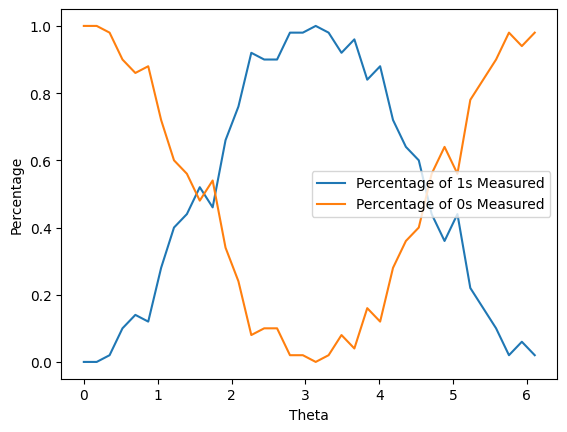

In [8]:
shots = 50
results = []
thetaRange = [t * 3.14/180 for t in range(0, 360, 10)]
for theta in thetaRange:
    count1 = 0
    for shot in range(shots):
        result = RyRotation.simulate(theta=theta)
        count1 = count1 + result
    results.append(count1/shots)


plt.plot(thetaRange, results, label="Percentage of 1s Measured")
plt.plot(thetaRange, [1-x for x in results], label="Percentage of 0s Measured")
plt.legend()
plt.xlabel("Theta")
plt.ylabel("Percentage")
plt.show()


### <span style="color:#61c2e8">Task 2 Questions</span>: 

* T2.1. Explain this graph. How does the parameter theta affect the measurement probability?

* T2.2. Derive the state prepared by applying the arbitrary $R_Y(\theta)$ gate to the arbitrary state $|\psi\rangle$. In other words, calculate $R_Y(\theta)|\psi\rangle$.

* T2.3 Explain how the angle $\theta$ can be implemented for a polarization photonic qubit. How about an atomic qubit?

The $R_y$ gate is shown below.
$$
    R_y(\theta) := e^{-i\theta\sigma_y/2} = \begin{bmatrix}
                                            \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
                                            \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
                                            \end{bmatrix}
$$
Initially, a qubit is created by the command $q=Qubit()$. This initializes a qubit with the function $\ket{0}$. Now, operating the $R_y$ gate on this qubit sets the qubit to the following sate.
$$
\begin{bmatrix}
\cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
\end{bmatrix}
\times
\begin{bmatrix}
1 \\ 
0
\end{bmatrix}
=
\begin{bmatrix}
\cos{\frac{\theta}{2}} \\
\sin{\frac{\theta}{2}}
\end{bmatrix}
$$
Therefore, the superposition state of the qubit is shown below.
$$
\ket{\psi} = \cos{\frac{\theta}{2}}\ket{0} + \sin{\frac{\theta}{2}}\ket{1}.
$$
At this state the probability of measuring the state $\ket{0}$ is $(\cos{\theta/2})^2$ and the probabilty of measuring the state $\ket{1}$ is $(\sin{\theta/2})^2$. Therefore, when $\theta=0$ the probability of measuring the state $\ket{0}$ is $1$ and the probability of measuring the state $\ket{1}$ is $0$. When $\theta=\pi/2$ the probability of measuring the state $\ket{0}$ is $0.5$ and the probability of measuring the state $\ket{1}$ is $0.5$. When $\theta=\pi$ the probability of measuring the state $\ket{0}$ is $0$ and the probability of measuring the state $\ket{1}$ is $1$. Finally, when $\theta=2\pi$ the probability of measuring the state $\ket{0}$ is $1$ and the probability of measuring the state $\ket{1}$ is $0$. This is what the graph shows.

##### T 2.2

Let $\psi=\cos{\phi}\ket{0} + \sin{\phi}\ket{1}$ for an arbritrary angle $\phi$ with respect to the $\ket{0}$ state. Therefore, $R_y(\theta)\ket{\psi}$ is shown below.
$$
\begin{align*}
    \begin{bmatrix}
    \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
    \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    \cos{\phi} \\
    \sin{\phi}
    \end{bmatrix}
    =
    \begin{bmatrix}
    \cos{\phi}\cos{\theta / 2} - \sin{\phi}\sin{(\theta / 2)} \\
    \cos{\phi}\sin{\theta / 2} + \sin{\phi}\cos{(\theta / 2)}
    \end{bmatrix}
    =
    \begin{bmatrix}
    \cos{(\phi + \theta / 2)} \\
    \sin{(\phi + \theta / 2)}
    \end{bmatrix}
\end{align*}
$$
Therefore, the $R_y(\theta)$ gate rotates the qubit about the y-axis by the angle $\theta/2$.

##### T 2.3

The angle $\theta$ can be implemented using a beam splitter or a polarization material with the appropriate thickness. The state $\ket{0}$ is polarized at angle $0$ and the state $\ket{1}$ is polarized at angle $\pi$. For an atomic qubit the states $\ket{0}$ and $\ket{1}$ represent two energy levels, the ground state and the excited state. The superposition is attained by a controlled lazer shots. 

>Note:
>
>We can actually define two other gates like the $R_Y(\theta)$ gate which allow us to describe all types of rotations. These two other gates are $R_X(\theta)\text{ and }R_Z(\theta)$. 
>
>$R_X(\theta) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}$
>
>
>$R_Z(\theta) = \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}$
>
>
>These gates cause a $\theta$ degree rotation about the X-axis and Z-axis respectively. Using them we can create any rotation on the Bloch Sphere. In fact the $H$ gate can be represented as follows: $H = -iR_Z(\pi)R_Y(-\frac{\pi}{2})$. 